In [2]:
import pandas as pd 
import numpy as np 
import os 
import seaborn as sns 
import matplotlib.pyplot as plt 
from glob import glob 

def load_df(log_dir):
    with open(log_dir, 'r') as f:
        data = f.readlines()
    df = pd.DataFrame(list(pd.Series(data).map(eval).values))    
    return df 

def load_log_data(class_name, version, result_dir):

    df = pd.DataFrame()
    for i,v in enumerate(version):
        log_dir = os.path.join(result_dir,class_name,v,'log.txt')
        
        temp_df = load_df(log_dir)
        temp_df['hue'] = v 
        
        df = pd.concat([df,temp_df])
    
    return df 

def plot_log(data,class_name, metrics:list, figsize:tuple = (10,7)):
    
    fig, axes = plt.subplots(len(metrics),1,figsize=figsize)
    
    for ax, metric in zip(axes, metrics):
        sns.lineplot(
            x = 'epoch',
            y = metric,
            data = data,
            hue = data['hue'],
            ax = ax 
        )
        
    fig.suptitle(class_name)
    plt.show()

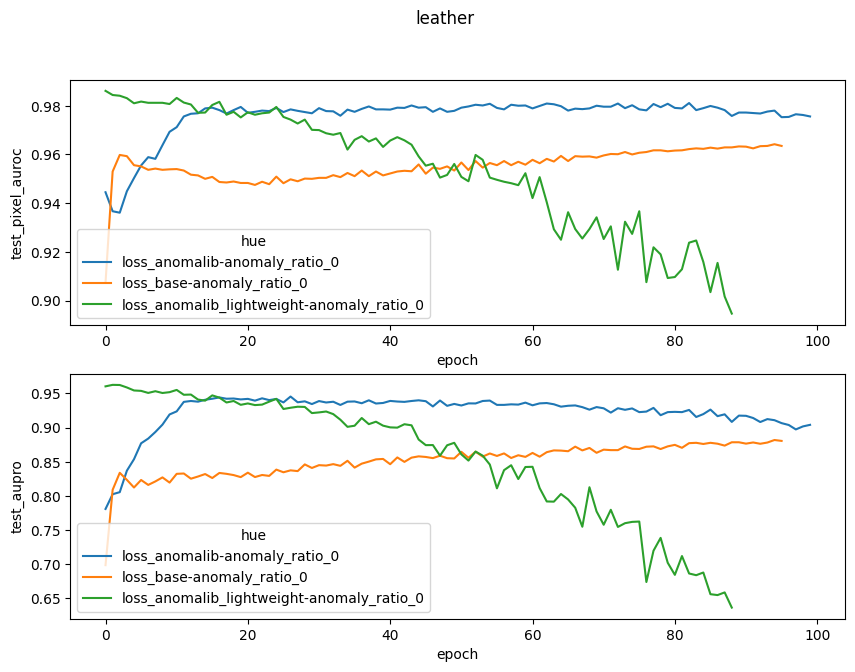

In [7]:
class_name = 'leather'
version = ['loss_anomalib-anomaly_ratio_0','loss_base-anomaly_ratio_0','loss_anomalib_lightweight-anomaly_ratio_0']
result_dir = './results/benchmark/MVTecAD/'
metrics = ['test_pixel_auroc','test_aupro']
df = load_log_data(class_name, version, result_dir)

plot_log(df,class_name, metrics)

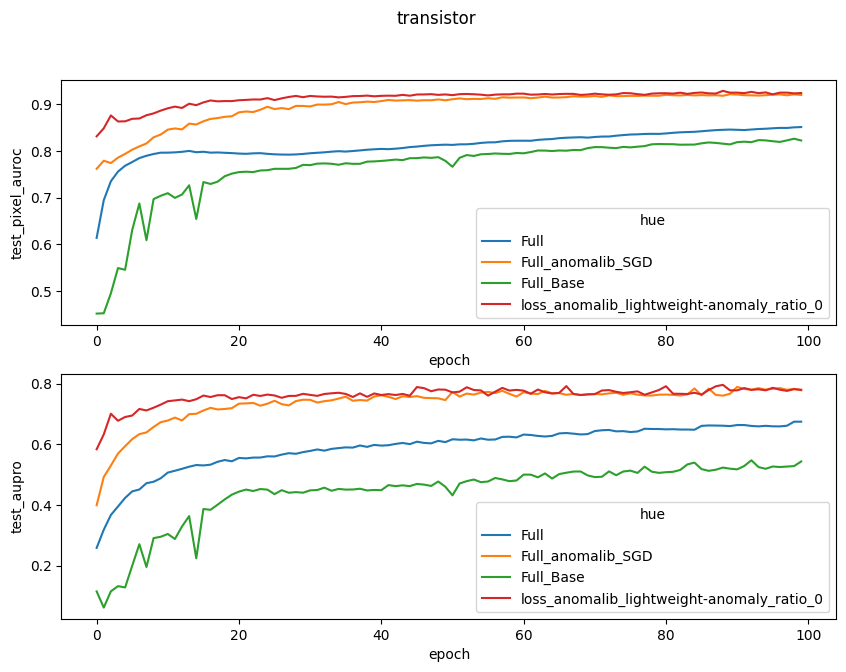

In [9]:
class_name = 'transistor'
version = ['Full','Full_anomalib_SGD','Full_Base','loss_anomalib_lightweight-anomaly_ratio_0']
result_dir = './results/benchmark/MVTecAD/'
metrics = ['test_pixel_auroc','test_aupro']
df = load_log_data(class_name, version, result_dir)

plot_log(df,class_name, metrics)

In [3]:
version = ['loss_anomalib_lightweight-anomaly_ratio_0']
result_dir = './results/benchmark/MVTecAD/'
metrics = ['test_pixel_auroc','test_aupro']

log_dirs = glob(os.path.join(result_dir,'*',version[0],'log.txt'))
df = pd.DataFrame()

for log_dir in log_dirs:
    temp_df = load_df(log_dir)
    temp_df['class'] = log_dir.split('/')[-3]
    
    df = pd.concat([df,temp_df])



In [4]:
df[df['epoch'] == 99][['class','test_pixel_auroc','test_aupro']]

,class,test_pixel_auroc,test_aupro
